In [17]:
import numpy as np
from PIL import Image

def read_image_to_matrix(file_path):
    # Open the image file
    img = Image.open(file_path).convert('L')  # Convert image to grayscale
    # Convert image to numpy array
    img_matrix = np.array(img)
    return img_matrix

def print_matrix(matrix):
    for row in matrix:
        print(' '.join(f'{val:3}' for val in row))

# Example usage
file_path = 'img.jpg'
matrix = read_image_to_matrix(file_path)
print_matrix(matrix)

154 162 186 186 162 162 169 155 220 168 135 141 152 163 172 174 162 185 158 148 160 146 145 155 128 102  81  76  59 106 136 122  92  96 118 105  74 121 110 105 107 150 118 108 129 125 124 108 191 140 129 121 110 122 130 139 131 131 132 141 133 131 132 145 127 122 131 118 116 127 126 137 113 138 151 141 134 141 144 139 130 142 166 156 137 136 141 163 125 129 145 143 136 123 115 147 162 142 129 155 128 130 133 159 133 161 143 137 127 134 108 115 124 118 143 117 121 113 130 149 127 129 155 146 130 101 115 118  84 121 130 131 150 153 169 214 151 157 180 173 159 156 151 169 141 157 165 180 149 155 143 140 143 140 152 161 187 137 133 167 156 142 160 193 186 206 241 209 230 201 194 129 135 116  83 115 107 127 123 133 125 132 117 125 123 114 115 138 124 161 157 128 137 115 148 112 103 101  88  62  36  72  48  42
160 149 153 155 152 166 175 159 170 154 152 159 155 151 156 159 161 180 167 159 152 141 144 133 124 128  66  89  93 136  81 110  95  84  95 126  99  79  85  94  82  88  92 128 147 124 

In [18]:
matrix.shape

(192, 204)

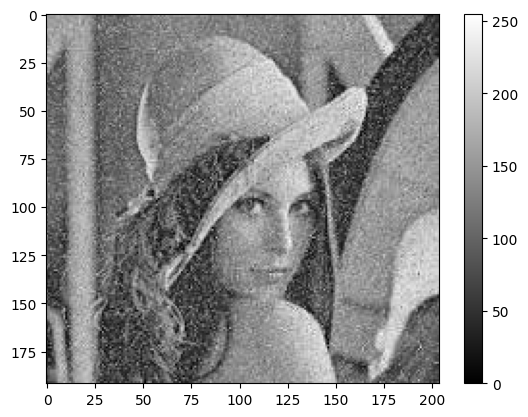

In [19]:
import matplotlib.pyplot as plt

def display_image_from_matrix(matrix):
    plt.imshow(matrix, cmap='gray', vmin=0, vmax=255)
    plt.colorbar()  # Optional: to show the color scale
    plt.show()

# Example usage
# Assuming 'matrix' is already defined
display_image_from_matrix(matrix)

In [30]:
import numpy as np

def apply_median_filter(matrix, filter_size=3):
    # Get the dimensions of the matrix
    rows, cols = matrix.shape
    # Calculate the padding size
    pad_size = filter_size // 2
    # Pad the matrix with zeros on all sides
    padded_matrix = np.pad(matrix, pad_size, mode='constant', constant_values=0)
    # Create an empty matrix to store the filtered values
    filtered_matrix = np.zeros_like(matrix)
    
    # Iterate over each pixel in the matrix
    for i in range(rows):
        for j in range(cols):
            # Extract the neighborhood
            neighborhood = padded_matrix[i:i+filter_size, j:j+filter_size]
            # Flatten the neighborhood and remove duplicates
            unique_values = np.unique(neighborhood.flatten())
            # Sort the unique values
            sorted_values = np.sort(unique_values)
            # Calculate the number of unique values
            N = len(sorted_values)
            # Calculate the median based on the number of unique values
            if N % 2 == 0:
                median_value = sorted_values[N//2 - 1]
            else:
                median_value = sorted_values[(N+1)//2 - 1]
            # Assign the median value to the corresponding pixel in the output matrix
            filtered_matrix[i, j] = median_value
    
    return filtered_matrix

In [31]:
import numpy as np

def weighted_averaging_filter(matrix, phi, k):
    def find_nearest_k_elements(kernel, current_value, k):
        # Flatten the kernel and calculate the absolute difference with the current value
        flat_kernel = kernel.flatten()
        differences = np.abs(flat_kernel - current_value)
        # Get the indices of the k smallest differences
        nearest_indices = np.argpartition(differences, k)[:k]
        # Return the k nearest values
        return flat_kernel[nearest_indices]

    def apply_filter_to_element(matrix, i, j, phi, k):
        # Extract the 3x3 kernel centered at (i, j)
        kernel = matrix[i-1:i+2, j-1:j+2]
        current_value = matrix[i, j]
        # Step 1: Find k elements in the kernel with the nearest value to the current element
        nearest_k_elements = find_nearest_k_elements(kernel, current_value, k)
        # Step 2: Calculate the average of these values
        avg = np.mean(nearest_k_elements)
        # Step 3: Return i if |i - avg| <= phi, otherwise return avg
        if abs(current_value - avg) <= phi:
            return current_value
        else:
            return avg

    # Get the dimensions of the matrix
    rows, cols = matrix.shape
    # Create an empty matrix to store the filtered values
    filtered_matrix = np.zeros_like(matrix)
    
    # Iterate over each pixel in the matrix (excluding the borders)
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            filtered_matrix[i, j] = apply_filter_to_element(matrix, i, j, phi, k)
    
    # Copy the border pixels from the original matrix
    filtered_matrix[0, :] = matrix[0, :]
    filtered_matrix[-1, :] = matrix[-1, :]
    filtered_matrix[:, 0] = matrix[:, 0]
    filtered_matrix[:, -1] = matrix[:, -1]
    
    return filtered_matrix

# Example usage
avg_matrix = matrix
phi = 0.2
k = 3

avg_matrix = weighted_averaging_filter(avg_matrix, phi, k)
print(avg_matrix)

[[154 162 186 ...  72  48  42]
 [160 150 156 ...  71  54  47]
 [165 154 146 ...  83  67  53]
 ...
 [ 50  92 102 ...  79  70  75]
 [ 66  76  95 ...  51  54  53]
 [ 33  67  64 ...  59  74 102]]


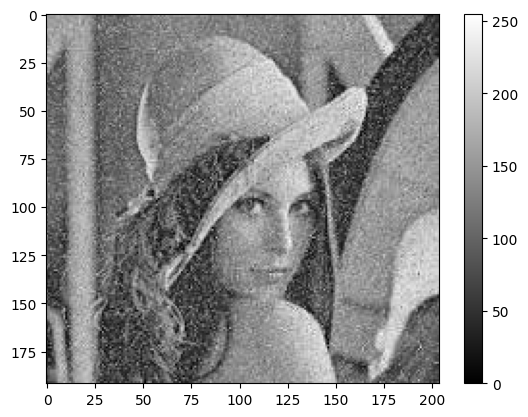

In [32]:
display_image_from_matrix(matrix)

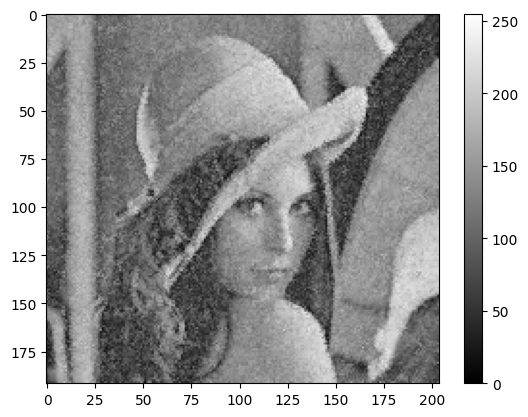

In [12]:
display_image_from_matrix(avg_matrix)

In [23]:
median_matrix = apply_median_filter(avg_matrix, filter_size=3)

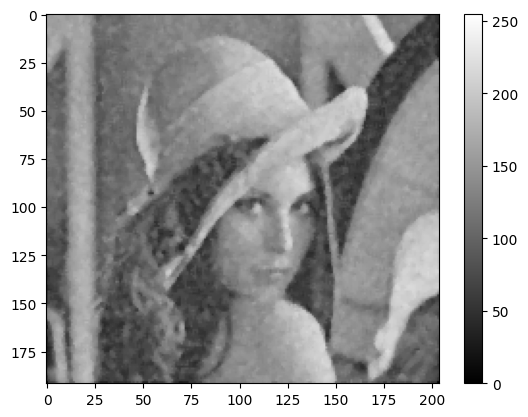

In [33]:
display_image_from_matrix(median_matrix)

In [34]:
import numpy as np

def apply_filter_to_element2(matrix, i, j, phi, k):
    def find_nearest_k_elements(kernel, current_value, k):
        # Flatten the kernel and calculate the absolute difference with the current value
        flat_kernel = kernel.flatten()
        differences = np.abs(flat_kernel - current_value)
        # Get the indices of the k smallest differences
        nearest_indices = np.argpartition(differences, k)[:k]
        # Return the k nearest values
        return flat_kernel[nearest_indices]

    # Extract the 3x3 kernel centered at (i, j)
    kernel = matrix[i-1:i+2, j-1:j+2]
    current_value = matrix[i, j]
    # Step 1: Find k elements in the kernel with the nearest value to the current element
    nearest_k_elements = find_nearest_k_elements(kernel, current_value, k)
    # Step 2: Calculate the average of these values
    avg = np.mean(nearest_k_elements)
    # Step 3: Return i if |i - avg| <= phi, otherwise return avg
    if abs(current_value - avg) <= phi:
        return current_value
    else:
        return avg

def weighted_averaging_filter2(matrix, phi, k):
    # Get the dimensions of the matrix
    rows, cols = matrix.shape
    # Pad the matrix with zeros on all sides
    padded_matrix = np.pad(matrix, 1, mode='constant', constant_values=0)
    # Create an empty matrix to store the filtered values
    filtered_matrix = np.zeros_like(matrix)
    
    # Iterate over each pixel in the padded matrix
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            filtered_matrix[i-1, j-1] = apply_filter_to_element2(padded_matrix, i, j, phi, k)
    
    return filtered_matrix


In [35]:

# Example usage
matrix2 = np.array([
    [1, 2, 3, 2],
    [4, 16, 2, 1],
    [4, 2, 1, 1],
    [2, 1, 2, 1]
])
phi = 2
k = 3
print('original matrix\n',matrix2)
filtered_matrix = weighted_averaging_filter2(matrix2, phi, k)
print('filtered_matrix\n',filtered_matrix)

original matrix
 [[ 1  2  3  2]
 [ 4 16  2  1]
 [ 4  2  1  1]
 [ 2  1  2  1]]
filtered_matrix
 [[1 2 3 2]
 [4 8 2 1]
 [4 2 1 1]
 [2 1 2 1]]


In [36]:
matrix2 = np.array([
    [1, 2, 3, 2],
    [4, 16, 2, 1],
    [4, 2, 1, 1],
    [2, 1, 2, 1]
])
filtered_matrix = apply_median_filter(matrix2, 3)
print(filtered_matrix)

[[2 2 2 1]
 [2 3 2 1]
 [2 2 2 1]
 [1 1 1 1]]


In [1]:
import numpy as np

def apply_median_filter2(matrix, kernel):
    # Get the dimensions of the matrix
    rows, cols = matrix.shape
    # Get the dimensions of the kernel
    k_rows, k_cols = kernel.shape
    # Calculate the padding size
    pad_size = k_rows // 2
    # Pad the matrix with zeros on all sides
    padded_matrix = np.pad(matrix, pad_size, mode='constant', constant_values=0)
    # Create an empty matrix to store the filtered values
    filtered_matrix = np.zeros_like(matrix)
    
    # Iterate over each pixel in the matrix
    for i in range(rows):
        for j in range(cols):
            # Extract the neighborhood
            neighborhood = padded_matrix[i:i+k_rows, j:j+k_cols]
            # Multiply the neighborhood with the kernel
            weighted_neighborhood = neighborhood * kernel
            # Flatten the weighted neighborhood
            flattened_neighborhood = weighted_neighborhood.flatten()
            # Sort the flattened neighborhood
            sorted_values = np.sort(flattened_neighborhood)
            # Calculate the number of values
            N = len(sorted_values)
            # Calculate the median based on the number of values
            if N % 2 == 0:
                median_value = sorted_values[N//2 - 1]
            else:
                median_value = sorted_values[(N+1)//2 - 1]
            # Assign the median value to the corresponding pixel in the output matrix
            filtered_matrix[i, j] = median_value
    
    return filtered_matrix

In [3]:
# Example usage
matrix = np.array([
    [1,9,8,5,9,4],
    [9,0,6,2,4,6],
    [2,6,1,1,8,4],
    [5,2,1,4,4,1],
    [5,3,6,0,2,5],
    [7,8,8,5,3,1]
])
kernel = np.array([
    [1, 2, 1],
    [2, 3, 2],
    [1, 2, 1]
])
filtered_matrix = apply_median_filter2(matrix, kernel)
print(filtered_matrix)

[[0 2 2 4 6 0]
 [2 8 5 8 5 8]
 [2 4 2 4 6 4]
 [4 6 3 2 4 3]
 [6 8 5 4 5 2]
 [0 6 3 2 2 0]]
